# 텐서

텐서(tensor)는 일관된 유형을 가진 다차원 배열(= dtype). 
지원되는 모든 모든 텐서는 tf.dtypes.DType에서 확인이 가능         
텐서는 일종의 넘파이어레이와 같으며 Python 숫자 및 문자열과 같이 변경할 수 없다. 즉 업데이트 할 수 없으며 새로운 텐서를 만들 수만 있다.

In [ ]:
import tensorflow as tf
import numpy as np

## 1. 기본 텐서 생성

단일 값을 포함하는 "축"이 없는 "스칼라" 또는 "순위-0" 텐서

In [ ]:
# 기본적으로 int32 텐서가 된다. 아래 "dtypes"를 참조하시오
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


한 개의 "축"이 존재하는 "벡터" 또는 "순위-1" 텐서

In [ ]:
# 이것을 float 텐서로 만들어 보자
rank_1_tensor = tf.constant([2., 3., 4.])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


두 개의 "축"이 존재하는 "행렬" 또는 "순위-2" 텐서

In [ ]:
# 구체적으로 설명하려면 생성 시 dtype(아래 참조)을 설정할 수 있다.
rank_2_tensor = tf.constant([[1,2],
                             [3,4],
                             [5,6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


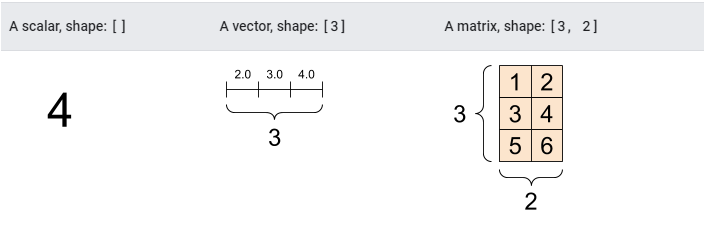

 두 개 이상의 "축"을 가진 텐서

In [ ]:
# 임의의 수의 축이 있을 수 있다.("차원"이라고도 함)
rank_3_tensor = tf.constant([
                             [[0, 1, 2, 3, 4],
                              [5, 6, 7, 8, 9,]],
                             [[10, 11, 12, 13, 14],
                              [15, 16, 17, 18, 19]],
                             [[20, 21, 22, 23, 24],
                              [25, 26, 27, 28, 29]]])
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


"축"이 두개 이상인 텐서를 시각화 하는 방법은 여러가지가 존재

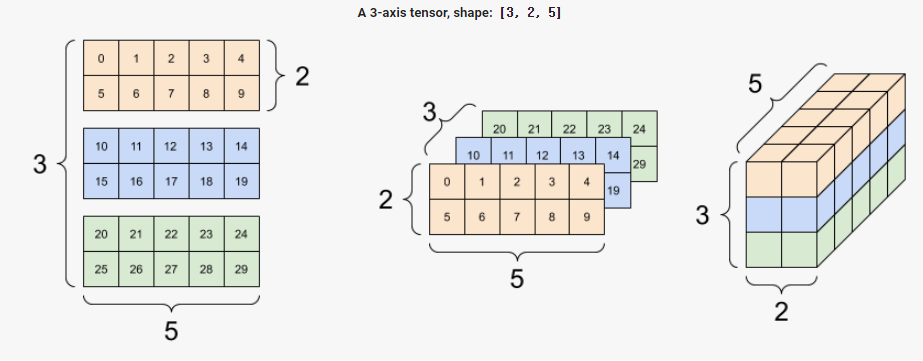

`np.array` 또는 `tensor.numpy` 메서드를 사용해 텐서를 NumPy 배열로 변환 가능

### np.array 이용

In [ ]:
rank_2_tensor = tf.constant([[1,2],
                             [3,4],
                             [5,6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [ ]:
np.array(rank_2_tensor)

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

### tensor.numpy 메서드 이용

In [ ]:
rank_2_tensor = tf.constant([[1,2],
                             [3,4],
                             [5,6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


In [ ]:
rank_2_tensor.numpy()

array([[1., 2.],
       [3., 4.],
       [5., 6.]], dtype=float16)

텐서에는 주로 float와 int가 들어있으나, 다른 유형도 존재
- 복소수
- 문자열

기본 `tf.Tensor` 클래스에서는 텐서가 "직사각형" 형태이어야 함.

즉, 각 축을 따라 모든 요소의 크기가 같아야 하나 다향한 형상을 처리할 수 있는 특수한 유형의 텐서도 존재
- 비정형
- 희소

텐서는 덧셈, 요소별 곱셈 및 행렬 곱셈을 포함한 기본 산술을 수행 가능

In [ ]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # `tf.ones([2,2])`라고도 할 수 있다.

print(tf.add(a,b), "\n") # 행렬의 요소별 덧셈
print(tf.multiply(a, b), "\n") # 행렬의 요소별 곱셈
print(tf.matmul(a, b),)  # 행렬의 곱셈

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)


In [ ]:
print(a + b, "\n") # 행렬의 요소별 덧셈
print(a * b, "\n") # 행렬의 요소별 곱셈
print(a @ b, "\n") # 행렬의 곱셈

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



텐서는 모든 종류의 연산(ops)에 사용

In [ ]:
c = tf.constant([[4., 5.],
                 [10., 1.]])

print(tf.reduce_max(c), "\n") # 가장 큰 값 찾기
print(tf.argmax(c), "\n") # 가장 큰 값을 가진 인덱스 찾기
print(tf.nn.softmax(c)) # softmax 계산하기

tf.Tensor(10.0, shape=(), dtype=float32) 

tf.Tensor([1 0], shape=(2,), dtype=int64) 

tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


## 2. 형상 정보

텐서는 형상이 있고 사용되는 용어는 다음과 같음
- 형상(Shape) : 텐서의 각 차원의 길이(요소의 수)
- 순위(Rank) : 텐서의 축의 수. 스칼라는 순위가 0, 벡터의 순위는 1, 행렬의 순위는 2
- 축 또는 차원(Axis or Dimension) : 텐서의 특정 차원
- 크기(Size) : 텐서의 총 항목 수, 곱 형상 벡터

텐서 및 `tf.TensorShape` 객체에는 이러한 객체에 액세스 하기 위한 편리한 속성을 포함하고 있음

In [ ]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

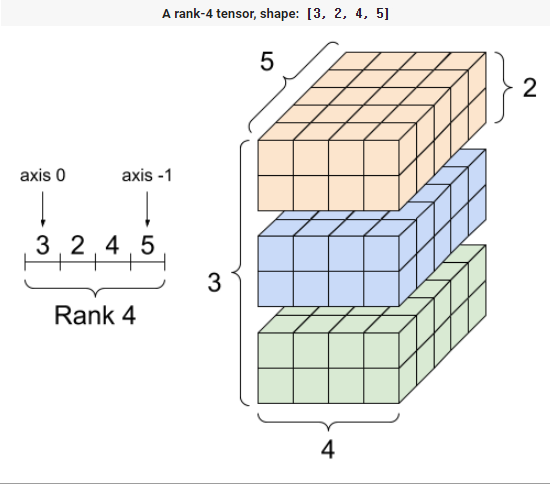

In [ ]:
print("Type of every element:", rank_4_tensor.dtype) # 모든 요소의 유형
print("Number of dimensions:", rank_4_tensor.ndim) # 차원의 수
print("Shape of tensor:", rank_4_tensor.shape) # 텐서의 형태
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0]) # 텐서의 0번 축을 따르는 요소
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1]) # 텐서의 마지막 축을 따르는 요소
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy()) # 모든 요소의 수

Type of every element: <dtype: 'float32'>
Number of dimensions: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


축은 종종 인덱스로 참조되지만 각각의 의미를 따라야 함.
축은 주로 전역에서 로컬 순서로 정렬된다. 

배치 축이 먼저 오고 그 다음 공간 차원과 각 위치에 대한 특성이 마지막에 온다.

이러한 방식으로 특성 벡터는 연속적인 메모리의 영역이다.

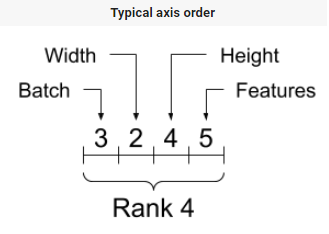

## 3. 인덱싱(Indexing)

### 3-1 단일 축 인덱싱

TensorFlow는 파이썬의 목록 또는 문자열 인덱싱과 마찬가지로 표준 파이썬 인덱싱 규칙과 NumPy 인덱싱의 기본 규칙을 따름
- 인덱스는 0에서 시작
- 음수 인덱스는 끝에서부터 거꾸로 계산
- 콜론, : 는 슬라이스 start:stop:step에 사용됨

In [ ]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


스칼라를 사용하여 인덱싱하면 축이 제거됨

In [ ]:
print("First", rank_1_tensor[0].numpy(), "\n")
print("Second", rank_1_tensor[1].numpy(), "\n")
print("Last", rank_1_tensor[-1].numpy())

First 0 

Second 1 

Last 34


: 슬라이스를 사용하여 인덱싱하면 축이 유지됨

In [ ]:
print("Everything:", rank_1_tensor[:].numpy(), "\n")
print("Before 4:", rank_1_tensor[:4].numpy(), "\n")
print("From 4 to the end:", rank_1_tensor[4:].numpy(), "\n")
print("From 2, before 7:", rank_1_tensor[2:7].numpy(), "\n")
print("Every other item:", rank_1_tensor[::2].numpy(), "\n")
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34] 

Before 4: [0 1 1 2] 

From 4 to the end: [ 3  5  8 13 21 34] 

From 2, before 7: [1 2 3 5 8] 

Every other item: [ 0  1  3  8 21] 

Reversed: [34 21 13  8  5  3  2  1  1  0]


### 3-2 다축 인덱싱

더 높은 순위의 텐서는 여러 인덱스를 전달하여 인덱싱 됨.

단일 축의 경우에서와 정확히 같은 규칙이 각 축에 독립적으로 적용

In [ ]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


각 인덱스에 정수를 전달하면 결과는 스칼라

In [ ]:
print(rank_2_tensor[1, 1].numpy())

4.0


정수와 슬라이스를 조합하여 인덱싱할 수 있음

In [ ]:
print("Second row:", rank_2_tensor[1, :].numpy(), "\n")
print("Second column:", rank_2_tensor[:, 1].numpy(), "\n")
print("Last row:", rank_2_tensor[-1, :].numpy(), "\n")
print("First item in last column:", rank_2_tensor[0, -1].numpy(), "\n")
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy())

Second row: [3. 4.] 

Second column: [2. 4. 6.] 

Last row: [5. 6.] 

First item in last column: 2.0 

Skip the first row:
[[3. 4.]
 [5. 6.]]


"축"이 3개인 텐서의 예

In [ ]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


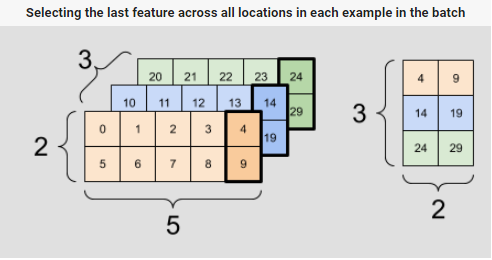

### 4. 형상 조작

텐서의 형상을 바꾸는 것은 유용함

In [ ]:
var_x = tf.Variable(tf.constant([[1], [2], [3]]))

print(var_x.shape)
print(var_x.shape.as_list())

(3, 1)
[3, 1]


텐서를 새로운 형상으로 바꿀 수 있음.

기본 데이터를 복제할 필요가 없어 빠르고 메모리 손실이 적다.

In [ ]:
reshaped = tf.reshape(var_x, [1, 3])

print(var_x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


데이터는 메모리에 레이아웃을 유지하고 요청한 모양으로 동일한 데이터를 가리키는 새로운 텐서가 생성된다.

TencorFlow는 C 스타일의 "행-중심"의 메모리 순서를 사용하며 여기에서 가장 오른쪽에 있는 인덱스를 증가시키는 것은 메모리의 단일 단계에 해당한다.

In [ ]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


텐서를 평평하게 하면 메모리에 배열된 순서를 알 수 있다.

In [ ]:
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


일반적으로 `tf.reshape`의 합리적인 용도는 인접한 축을 결합하거나 분할하는 것(또는 1을 추가하거나 제거)

이 3x2x5 텐서의 경우, 슬라이스가 혼합되지 않기 때문에 (3x2)x5 또는 3x(2x5)로 재구성하는 것이 합리적

In [ ]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


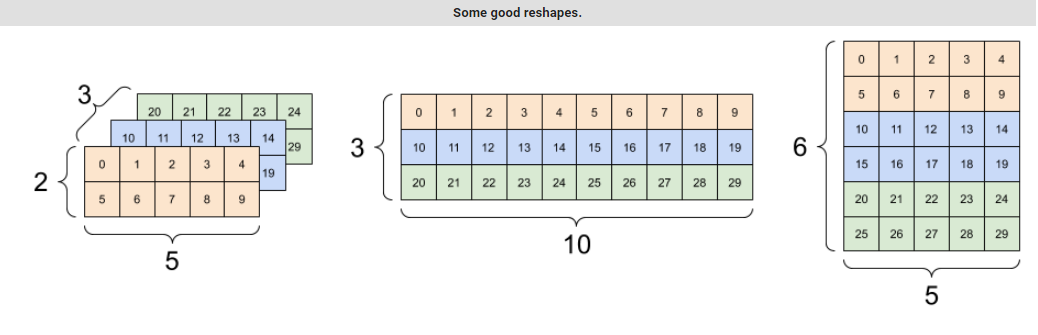

전체 요소 수가 동일한 새 도형에 대해 "재형상"이 잘 작동하지만 축의 순서를 따르지 않는 경우 유용하게 사용할 수 없음

`tf.reshape`에서는 축 교환이 작동하지 않으므로`tf.transpose`가 필요

In [ ]:
# Bad examples: don't do this

# You can't reorder axes with reshape.
print(tf.reshape(rank_3_tensor, [2, 3, 5]), "\n") 

# This is a mess
print(tf.reshape(rank_3_tensor, [5, 6]), "\n")

# This doesn't work at all
try:
  tf.reshape(rank_3_tensor, [7, -1])
except Exception as e:
  print(f"{type(e).__name__}: {e}")

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]], shape=(2, 3, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]], shape=(5, 6), dtype=int32) 

InvalidArgumentError: Input to reshape is a tensor with 30 values, but the requested shape requires a multiple of 7 [Op:Reshape]


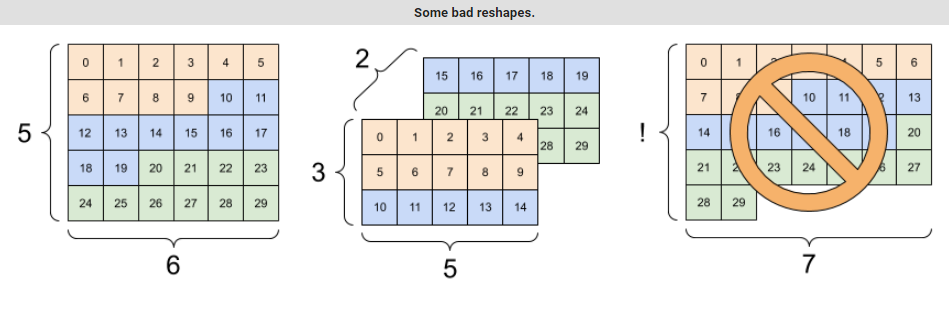

## 4. DTypes 에 대한 추가 정보

`tf.Tensor`의 데이터 유형을 검사하려면 `Tensor.dtype` 속성을 사용

Python 객체에서 `tf.Tensor`를 만들 때 선택적으로 데이터 유형을 지정할 수 있다.

그렇지 않으면 TensorFlow는 데이터를 나타낼 수 있는 데이터 유형을 선택하고 TensorFlow는 Python정수를 `tf.int32`로, Python 부동 소수점 숫자를 `tf.float32`로 변환한다. 그렇지 않으면 TensorFlow는 NumPy가 배열로 변환할 때 사용하는 것과 같은 규칙을 사용한다.

In [ ]:
the_f64_tensor = tf.constant([2.2, 3.3, 4.4], dtype=tf.float64)
the_f16_tensor = tf.cast(the_f64_tensor, dtype=tf.float16)
# Now, let's cast to an uint8 and lose the decimal precision
the_u8_tensor = tf.cast(the_f16_tensor, dtype=tf.uint8)
print(the_u8_tensor)

tf.Tensor([2 3 4], shape=(3,), dtype=uint8)


## 5. 브로드캐스팅(Brodcastring)

브로드캐스팅은 NumPy의 해당 특성에서 차용된 개념.

특정 조건에서는 작은 텐서가 결합 연산을 실행할 때 자동으로 더 큰 텐서에 맞게 자동으로 "확장"된다

가장 간단하고 일반적인 경우는 스칼라에 텐서를 곱하거나 추가하는 경우이다. 이 경우, 스칼라는 다른 인수와 같은 형상으로 브로드캐스팅된다

In [ ]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2), "\n")
print(x * y, "\n")
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32) 

tf.Tensor([2 4 6], shape=(3,), dtype=int32) 

tf.Tensor([2 4 6], shape=(3,), dtype=int32)


마찬가지로 크기가 1인 축도 다른 인수와 일치하도록 확장할 수 있다. 두 인수 모두 동일한 계산으로 확장할 수 있으며 이 경우 3x1 행렬에 요소별로 1x4행렬을 곱하여 3x4 행렬을 만든다.

선행 1이 옵션인 방법에 주목. y의 모양은 `[4]`


In [ ]:
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


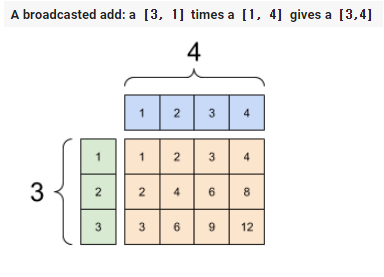

브로드캐스팅이 없는 위와 동일한 작업 방법

In [ ]:
x_stretch = tf.constant([[1, 1, 1, 1],
                         [2, 2, 2, 2],
                         [3, 3, 3, 3]])

y_stretch = tf.constant([[1, 2, 3, 4],
                         [1, 2, 3, 4],
                         [1, 2, 3, 4]])

print(x_stretch * y_stretch)  # Again, operator overloading

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


대부분의 경우 브로드캐스팅은 브로드캐스트 연산으로 메모리에서 확장된 텐서를 구체화하지 않으므로 시간과 메모리 사용에 효율적이다.

`tf.broadcast_to`를 사용하여 브로드캐스팅이 어떤 모습인지 알 수 있다.

In [ ]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


예를들어 수학적인 연산과 달리 `broadcast_to`는 메모리를 절약하기 위해 특별한 연산을 수행하지 않는다. 여기에서 텐서를 구체화한다.

## 6. tf.convert_to_tensor

`tf.matmul` 및 `tf.reshape`과 같은 대부분의 ops는 클래스 tf.Tensor의 인수를 사용한다. 그러나 위의 경우 텐서 형상의 Python 객체가 허용됨을 알 수 있다.

전부는 아니지만 대부분의 ops는 텐서가 아닌 인수에 대해 `convert_to_tensor`를 호출한다. 변환 레지스트리가 있어 NumPy의 `ndarray`, `TensorShape`, Python 목록 및 `tf.Variavle`과 같은 대부분의 객체 클래스는 모두 자동으로 변환된다.

자세한 내용은 `tf.register_tensor_conversion_function`을 참조하고, 자신만의 유형이 있으면 자동으로 텐서로 변환할 수 있다.

### 7. 비정형 텐서(Ragged Tensors)

어떤 축을 따라 다양한 수의 요소를 가진 텐서를 비정형 텐서(ragged tensor)라고 한다. 비정형 데이터에는 `tf.ragged.RaggedTensor`를 사용한다.  
예를들어 비정형 텐서는 정규 텐서로 표현할 수 없다.

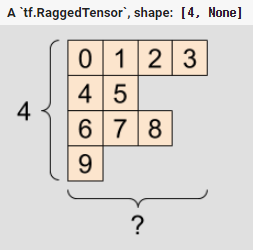

In [ ]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [ ]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


대신 `tf.ragged.constant`를 사용하여 `tf.RaggedTensor`를 생성한다.

In [ ]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


`tf.RaggedTensor`의 형상에는 알 수 없는 길이의 일부 축이 포함된다.

In [ ]:
print(ragged_tensor.shape)

(4, None)


## 8. 문자열 텐서(String tensors)

`tf.string`은 `dtype`이며, 텐서에서 문자열(가변 길이의 바이트 배열)과 같은 데이터를 나타낼 수 있다.

문자열은 원자성이므로 Python 문자열과 같은 방식으로 인덱싱할 수 없다. 문자열의 길이는 텐서의 축 중의 하나가 아니다.

문자열을 조작하는 함수에 대해서는 `tf.strings`를 참조

다음은 스칼라 문자열 텐서이다

In [ ]:
# 텐서는 문자열이 될 수 있다. 여기에서도 스칼라 문자열이 있다.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


문자열의 벡터는 다음과 같다.

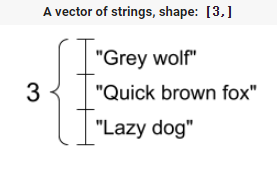

In [ ]:
# 길이가 다른 세 개의 문자열 텐서가 있는 경우에는 괜찮다.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# 모양은 (3,) 이고 문자열 길이는 포함되지 않는다.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


위의 출력에서 `b` 접두사는 `tf.string` dtype이 유니코드 문자열이 아니라 바이트 문자열임을 나타낸다.

유니코드 문자를 전달하면 UTF-8로 인코딩된다.

In [ ]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

문자열이 있는 일부 기본 함수는 `tf.strings`를 포함하여 `tf.strings.split`에서 찾을 수 있다.

In [ ]:
# split을 사용하여 문자열을 텐서 세트로 분할할 수 있다.
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [ ]:
# 그러나 문자열의 텐서를 분할하면 `RaggedTensor`로 바뀐다.
# 각 문자열이 다른 수의 부분으로 분할될 수 있기 때문이다
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


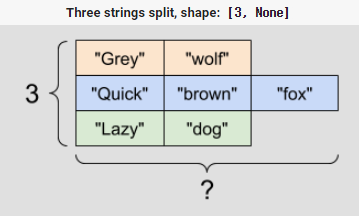

그리고 `tf.string.to_number`:

In [ ]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


`tf.cast`를 사용하여 문자열 텐서를 숫자로 변환할 수는 없지만, 바이트로 변환한 다음 숫자로 변환할 수 있다.

In [ ]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings, "\n")
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string) 

Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [ ]:
# 또는 유니코드로 분할한 다음 디코딩한다
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


`tf.string` dtype은 TensorFlow의 모든 원시 바이트 데이터에 사용된다. `tf.io` 모듈에는 이미지 디코딩 및 csv구문 분석을 포함하여 데이터를 바이트로 변환하거나 바이트에서 변환하는 함수가 포함되어 있다.

## 9. 희소 텐서(Sparse tensors)

때때로 매우 넓은 임베딩 공간과 같이 데이터가 희소하다. TensorFlow는 `tf.sparse.SparseTensor` 및 관련 연산을 지원하여 희소 데이터를 효율적으로 저장한다

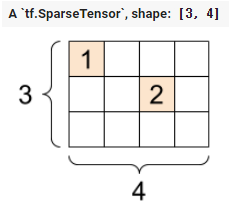

In [ ]:
# 희소 텐서는 메모리 효율적인 방식으로 인덱스별로 값을 저장한다
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# 희소 텐서를 고밀도로 변환할 수 있다.
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)
